In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.font_manager as fm

pd.options.display.max_columns = None
%matplotlib inline

# 한글 폰트
plt.rcParams['font.family'] = 'NanumGothic'

# 마이너스 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 나눔 고딕의 경로
font_prop = fm.FontProperties(fname=font_path).get_name()
# 한글 폰트 설정
matplotlib.rcParams['font.family'] = font_prop

# 전역 팔레트 설정 (예: 'Set2' 팔레트 사용)
sns.set_palette('Set2')

In [29]:
regular_season = pd.read_csv('./datas/Regular_Season_Batter.csv')
regular_season.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,height,weight,weight_per_height,pos,hand
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,177,93,0.525424,내야수,우타
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,180,72,0.400000,내야수,좌타
2,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686,180,72,0.400000,내야수,좌타
3,1,강경학,2015,한화,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673,180,72,0.400000,내야수,좌타
4,1,강경학,2016,한화,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489,180,72,0.400000,내야수,좌타


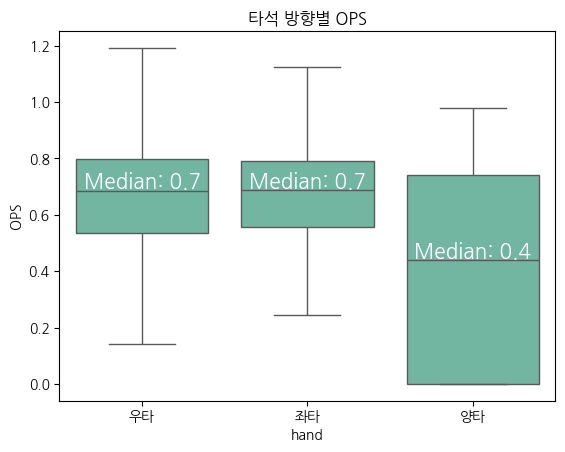

In [30]:
ax = sns.boxplot(x='hand', y = 'OPS', data = regular_season, showfliers = False)
plt.title('타석 방향별 OPS')

# 타석 방향별 중앙값
median = regular_season.groupby('hand')['OPS'].median().to_dict()

# 박스 중앙에 글자 표시
for patch in ax.get_xticklabels():
    ax.text(
            patch.get_text(), # 어디 박스에 할 것인가
            median[patch.get_text()] + 0.03, # 값에서 0.03만큼 더한 위치
            f'Median: {median[patch.get_text()]:.1f}', # 사용할 텍스트
            ha='center', # 가로 중앙 기준
            va='center', # 세로 중앙 기준
            fontsize=15, # 글자 사이즈
            color='white' # 글자 색
            )
    
plt.show()